## The scikit-learn Notebook by Walter Regan

***

### This notebook will contain a clear and concise overview of the scikit-learn Python library, demonstrating at least three interesting scikit-learn algorithms of choice. You may choose to have an overall spread of examples across the library or pick a particular part that you find interesting. <b />
**Edit into first person present tense when I decide on which examples to do.**

In [8]:
# Efficient numerical arrays
import numpy as np

# plotting
import matplotlib.pyplot as plt

In [2]:
# change default style sheet
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

# change default figure size
plt.rcParams['figure.figsize'] = [10, 5]

<b />

### numpy.random.normal

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

***

In [3]:
 # mean and standard deviation
mu, sigma = 0, 0.1

# draw random samples from a normal (Gaussian) distribution
s = np.random.normal(mu, sigma, 1000)

In [4]:
# verify the mean and the variance
abs(mu - np.mean(s))

0.0008101983223560143

In [5]:
abs(sigma - np.std(s, ddof=1))

0.002190571315690462

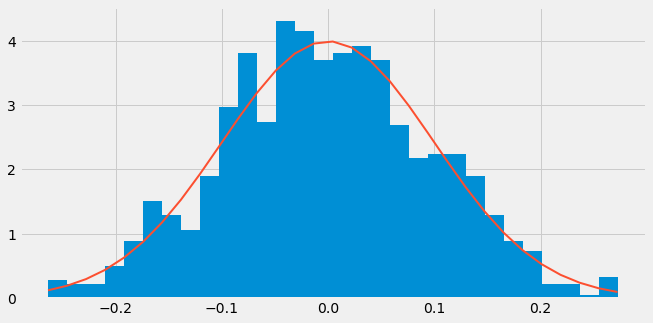

In [6]:
# Verify the mean and the variance
count, bins, ignored = plt.hist(s, 30, density=True)
f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma**2))
plt.plot(bins, f, linewidth=2)
plt.show()

## End - Section 1
***

<br>

## scikit-learn Tutorials Examples

[scikit-learn Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
***

## An introduction to machine learning with scikit-learn

### Loading an example dataset

There are a few standard datasets that come with scikit-learn. The __iris__ and __digits__ datasets for classification and the __diabetes dataset__ for regression.

In [4]:
#import sklearn.datasets as datasets
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
digits = datasets.load_digits()

In [57]:
# gives access to the features that can be used to classify the digits samples
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [58]:
# gives the ground truth for the digit dataset
# that is the number corresponding to each digit image that we are trying to learn
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
print(digits.target)

[0 1 2 ... 8 9 8]


<br>

### Learning and predicting

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an ___estimator___ to be able to predict the classes to which unseen samples belong.

In [62]:
# estimator class
from sklearn import svm
#import sklearn.svm as svm

In [63]:
# clf - for classifier, here is an estimator instance
clf = svm.SVC(gamma=0.001, C=100)

__Choosing the parameters of the mode__

In [64]:
# set the value of gamma manually
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

In [65]:
# predict new values
clf.predict(digits.data[-1:])

array([8])

### Conventions

scikit-learn estimators follow certain rules to make their behavior more predictive. These are described in more detail in the Glossary of Common Terms and API Elements.
https://scikit-learn.org/stable/glossary.html#glossary

__Type Casting__<br>
Unless otherwise specified, input will be cast to float64

In [14]:
import numpy as np

In [15]:
from sklearn import random_projection

In [16]:
rng = np.random.RandomState(0)

In [17]:
X = rng.rand(10, 2000)

In [18]:
X = np.array(X, dtype='float32')

In [19]:
X.dtype

dtype('float32')

In [20]:
transformer = random_projection.GaussianRandomProjection()

In [21]:
X_new = transformer.fit_transform(X)

In [22]:
X_new.dtype

dtype('float64')

In [23]:
#from sklearn import datasets

In [24]:
from sklearn.svm import SVC

In [25]:
#iris = datasets.load_iris()

In [26]:
#clf = SVC()

In [27]:
clf = svm.SVC()

In [28]:
clf.fit(iris.data, iris.target)

SVC()

In [29]:
# returns an integer arrayas iris.target an integer array was used to fit
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [30]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [31]:
# returns a string, as iris.target_names was used for fitting
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

<br>

__Refitting and updating parameters__

Hyper-parameters of an estimator can be updated after it has been constructed via the set_params() method. Calling fit() more than once will overwrite what was learned by any previous fit().

In [32]:
#import numpy as np

In [33]:
#from sklearn.datasets import load_iris

In [34]:
#from sklearn.svm import SVC

In [35]:
X, y = datasets.load_iris(return_X_y= True)

In [36]:
clf= svm.SVC()

In [42]:
# set_parms(): Available in any estimator, takes keyword arguments corresponding to keys in get_params.

# change default kernel 'rbf' to linear
clf.set_params(kernel='linear').fit(X, y)

SVC(kernel='linear')

In [38]:
# make prediction
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [41]:
# change kernel back to 'rbf' to refit the estimator
clf.set_params(kernel='rbf').fit(X, y)

SVC()

In [40]:
# make second prediction
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

<br>

__Multiclass vs. multilabel fitting__

When using ___multiclass classifiers___, the learning and prediction task that is performed is dependent on the format of the target data fit upon:

In [45]:
#from sklearn.svm import SVC

In [46]:
#from sklearn.multiclass import OneVsRestClassifier
import sklearn.multiclass as multiclass
OneVsRestClassifier = multiclass.OneVsRestClassifier

In [47]:
from sklearn.preprocessing import LabelBinarizer

In [48]:
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]

In [49]:
y = [0, 0, 1, 1, 2]

In [50]:
# the classifier is fit on a 1d array of multiclass labels 
classif = OneVsRestClassifier(estimator=SVC(random_state=0))

In [52]:
# the predict() method therefore provides corresponding multiclass predictions
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [53]:
# the classifier is fit() on a 2d binary label representation of y, using the LabelBinarizer.
# In this case predict() returns a 2d array representing the corresponding multilabel predictions.
y = LabelBinarizer().fit_transform(y)

In [54]:
classif.fit(X,y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

Note above: the fourth and fifth instances returned all zeroes, indicating that they matched none of the three labels fit upon. With multilabel outputs, it is similarly possible for an instance to be assigned multiple labels

In [110]:
from sklearn.preprocessing import MultiLabelBinarizer
#import sklearn.preprocessing as preprocessing
#MultiLabelBinarizer = preprocessing.MultiLabelBinarizer

In [111]:
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]

In [112]:
y = MultiLabelBinarizer().fit_transform(y)

In [56]:
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In this case, the classifier is fit upon instances each assigned multiple labels. The ___MultiLabelBinarizer___ is used to binarize the 2d array of multilabels to fit upon. As a result, predict() returns a 2d array with multiple predicted labels for each instance.

## End - Introduction to machine learning with scikit-learn

<br>

## A tutorial on statistical-learning for scientific data processing
***

#### 1. Statistical learning: the setting and the estimator object in scikit-learn

__Datasets__<br> 
Scikit-learn deals with learning information from one or more datasets that are represented as 2D arrays. They can be understood as a list of multi-dimensional observations. We say that the first axis of these arrays is the samples axis, while the second is the features axis.

___A simple example shipped with scikit-learn: iris dataset___<br>
It is made of 150 observations of irises, each described by 4 features: their sepal and petal length and width, as detailed in iris.DESCR.

In [73]:
from sklearn import datasets

In [74]:
iris = datasets.load_iris()

In [75]:
data = iris.data

In [76]:
data.shape

(150, 4)

 ___An example of reshaping data would be the digits dataset___<br>
The digits dataset is made of 1797 8x8 images of hand-written digits.

In [77]:
digits = datasets.load_digits()

In [78]:
digits.images.shape

(1797, 8, 8)

In [79]:
import matplotlib.pyplot as plt

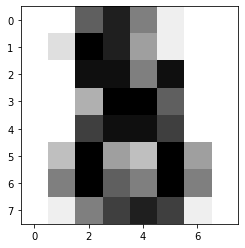

In [80]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

To use this dataset with scikit-learn, transform each 8x8 image into a feature vector of length 64

In [81]:
data = digits.images.reshape((digits.images.shape[0], -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

***
### Estimators objects

__Fitting data__<br>
The main API implemented by scikit-learn is that of the ___estimator___. An estimator is any object that learns from data; it may be a ___classification, regression___ or ___clustering___ algorithm or a ___transformer___ that extracts/filters useful features from raw data.

All estimator objects expose a fit method that takes a dataset (usually a 2-d array)

In [87]:
# estimator.fit(data)

__Estimator parameters__<br>
All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute

In [85]:
# estimator = Estimator(param1=1, param2=2)
# estimator.param1

__Estimated parameters__<br>
When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore

In [86]:
# estimator.estimated_param_ 

#### End - Statistical learning: the setting and the estimator object in scikit-learn

<br><br>
#### 2. Supervised learning: predicting an output variable from high-dimensional observations
***

__The problem solved in supervised learning__<br>
Supervised learning consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.

All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.

__Classification__<br>
If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a classification task.

__Regression__<br>
On the other hand, if the goal is to predict a continuous target variable, it is said to be a regression task.

_When doing classification in scikit-learn, __y__ is a vector of integers or strings._

### Nearest neighbor and the curse of dimensionality

__Classifying irises__<br>
The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width

In [115]:
import numpy as np
from sklearn import datasets

In [127]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [128]:
np.unique(iris_y)

array([0, 1, 2])

In [143]:
# Split iris data in train and test data
# A random permutation, to split the data randomly

In [133]:
np.random.seed(0)

In [134]:
indices = np.random.permutation(len(iris_X))

In [135]:
iris_y_train = iris_y[indices[:-10]]

In [136]:
iris_y_train = iris_y[indices[:-10]]

In [137]:
iris_X_test = iris_X[indices[-10:]]

In [138]:
iris_y_test = iris_y[indices[-10:]]

In [139]:
# create and fit a nearest-neighbour classifier
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn = KNeighborsClassifier()

In [141]:
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [142]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [144]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

__The curse of dimensionality__<br>
Dimensionally cursed phenomena occur in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. It is a core problem that machine learning addresses.

### Linear model: from regression to sparsity

In [146]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [147]:
diabetes_X_train = diabetes_X[:-20]

In [148]:
diabetes_X_test  = diabetes_X[-20:]

In [149]:
diabetes_y_train = diabetes_y[:-20]

In [150]:
diabetes_y_test  = diabetes_y[-20:]

## End - A tutorial on statistical-learning for scientific data processing

<br>

## Classification Lecture Tutorial

The iris data set is the most common dataset used in teaching machine learning. Using pandas and seaborn to introduce this topic.
***

In [459]:
# numerical arrays
import numpy as np

# data frames
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# logistic regression
import sklearn.linear_model as lm

# k nearest neighbours
import sklearn.neighbors as nei

# helper functions
import sklearn.model_selection as mod

# fancier, statistical plots
import seaborn as sns

In [460]:
# standard plot size
plt.rcParams['figure.figsize'] = (15, 18)

# standard colour scheme
plt.style.use('ggplot')

<br>

__The Iris Dataset__

In [461]:
# load the iris data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

# display data, maybe classify four variables of a average setosa together to archetype a setosa
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [462]:
# summary statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br>

__Visualise__

The below plots every pair of variables against every other pair. The parameter df is dataframe and parameter hue='species' is to use the species column in the dataframe.
The six plots on the bottom left are mirror images of the six plots on the top  right.
In the main diagonal ther are Kernel Density Estimate Plots, which are fancier forms of histograms. 

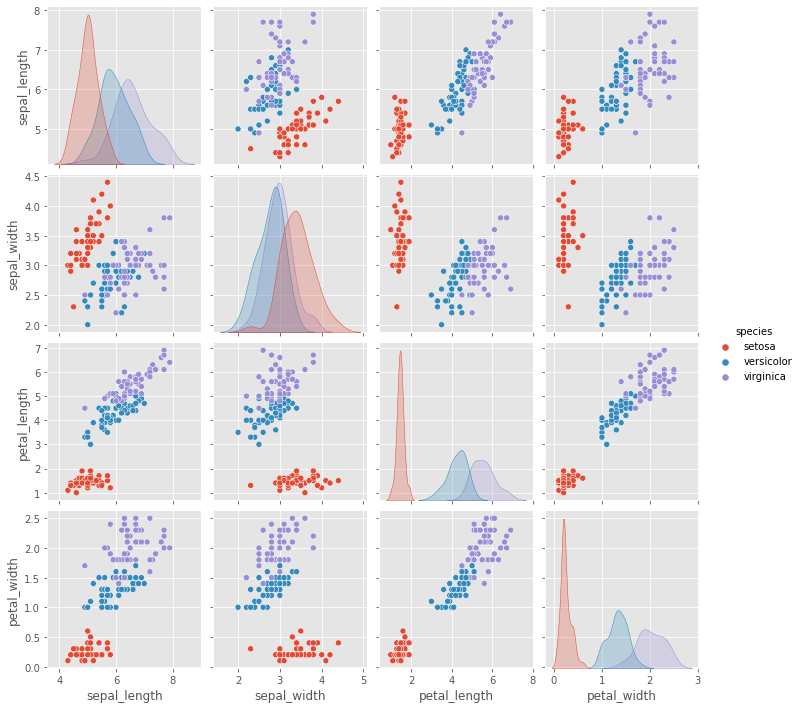

In [464]:
# scatter plots and kdes
sns.pairplot(df, hue='species')

<br>

__Two Dimensions__

A key difficult in machine learning is the number of dimensions in datasets such as sepal_length, sepal_width, petal_length, petal_width and species. We will use only two dimensions sepal_length and petal_width here to see if we can make sense of the methodology.

Using pyplot and seaborn to display resultant plots. seaborn is very useful for displaying an overview of data, whereas pyplot is used for more in depth plots.

Text(0, 0.5, 'Petal width')

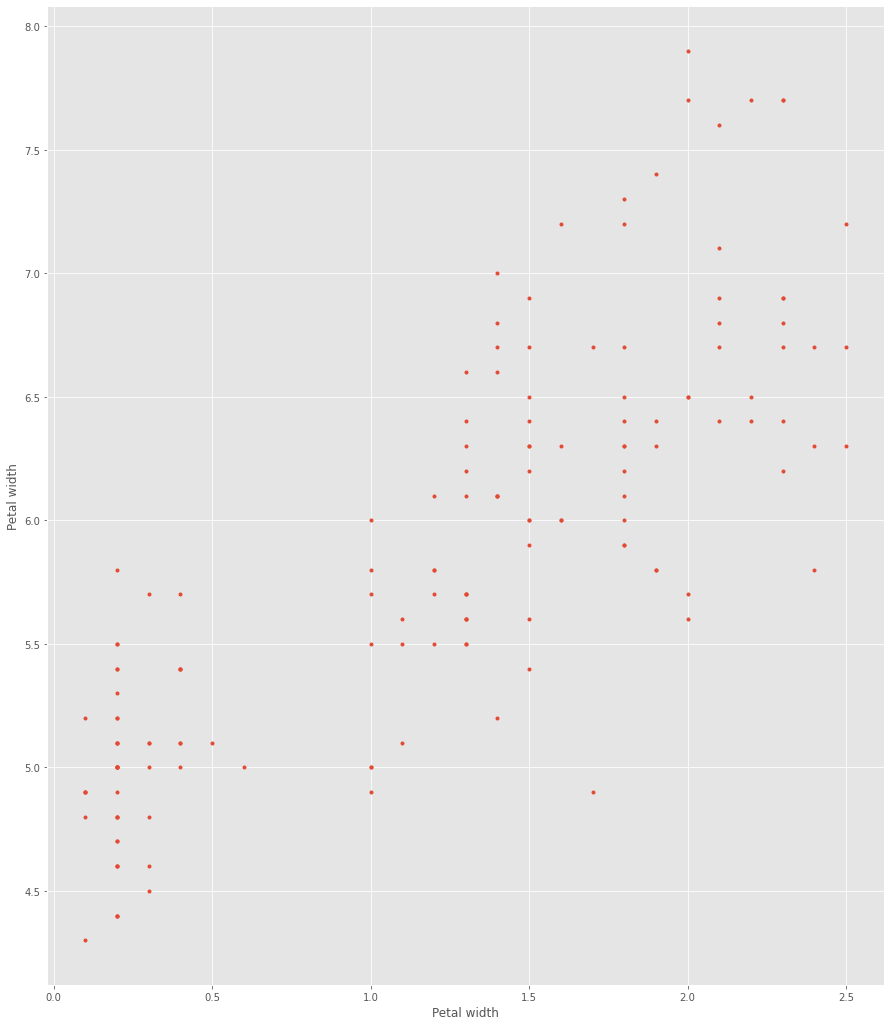

In [466]:
# Using pyplot

# new figure
fig, ax = plt.subplots()

# scatter plot
ax.plot(df['petal_width'], df['sepal_length'], '.')

# set axis loabls
ax.set_xlabel('Petal width')
ax.set_ylabel('Petal width')

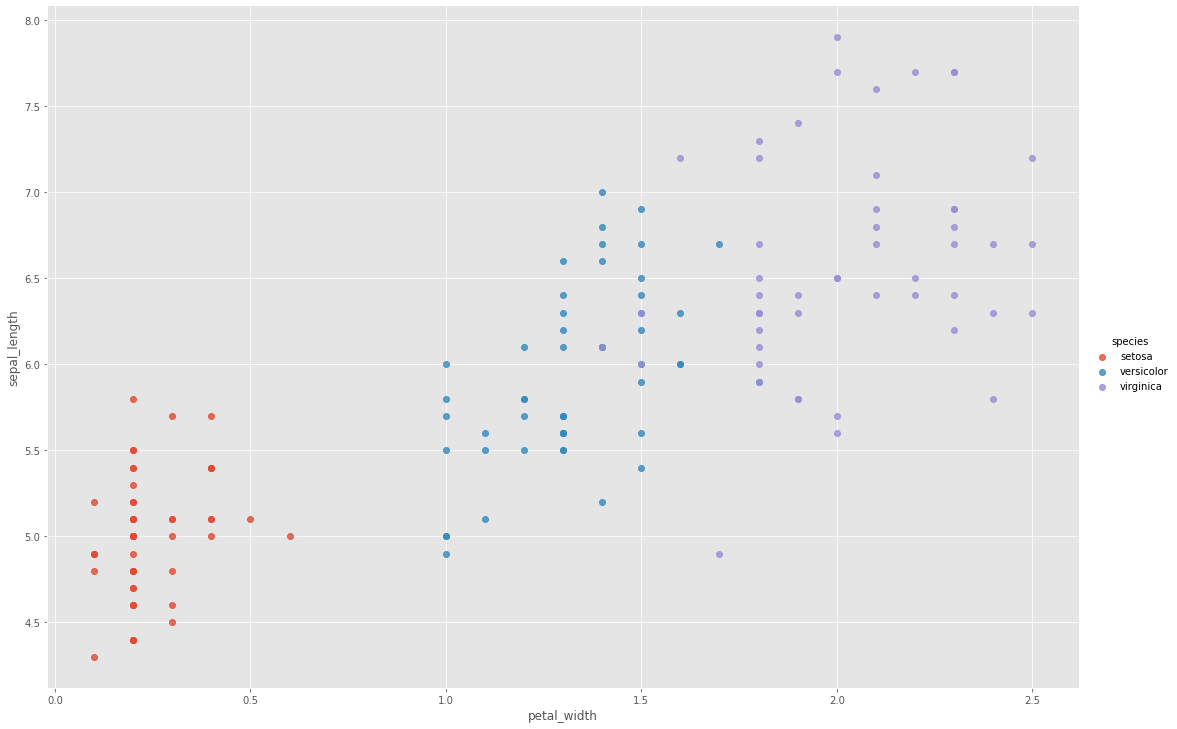

In [467]:
# Using seaborn

# great for creating complex plots with one command
sns.lmplot(x="petal_width", y="sepal_length", hue='species', data=df, fit_reg=False, height=10, aspect=1.5);

# set fit_reg=True will return a best fit line
#sns.lmplot(x='petal_width', y='sepal_length', hue='species', data=df, fit_reg=True, height=10, aspect=1.5)

# turn off/remove hue='species' with fit_reg=True
#sns.lmplot(x='petal_width', y='sepal_length', data=df, fit_reg=True, height=10, aspect=1.5)

<br>

__Using pyplot__

Using pyplot to colour each of the dots. To achieve this do three separate plots, one on top of each other.

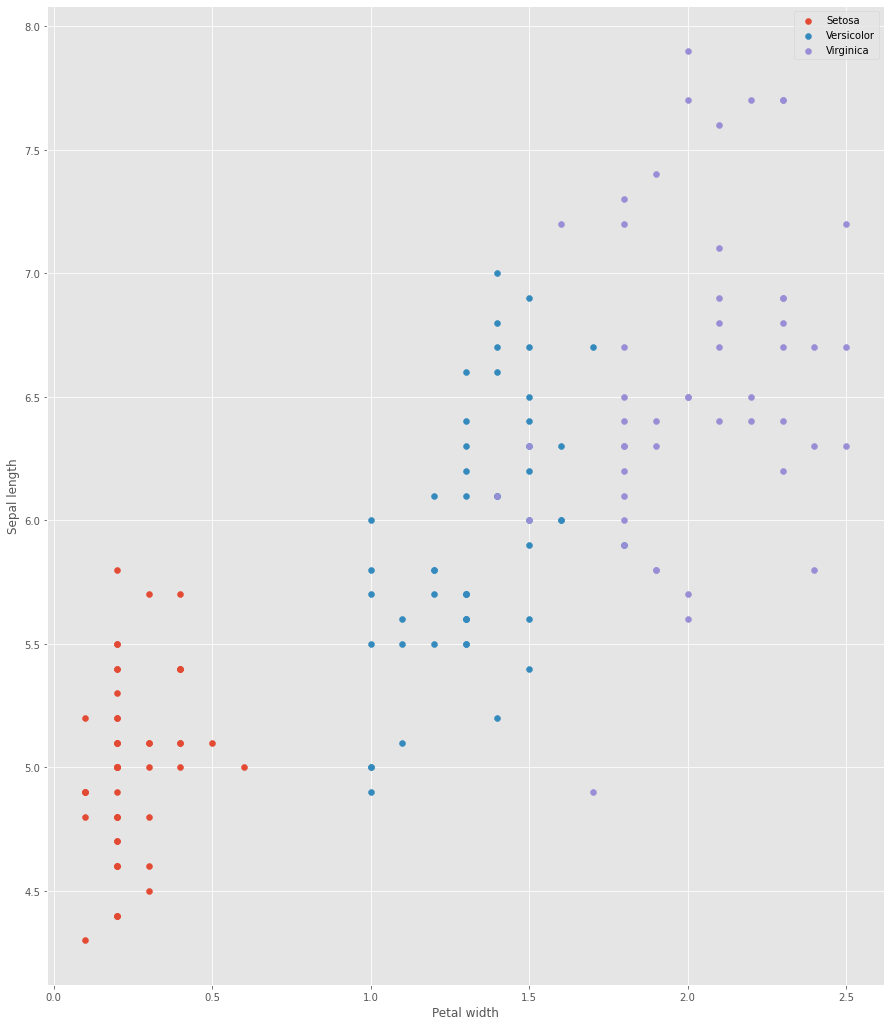

In [468]:
# Segregate the data.

# in pandas in the dataframe df, get the species column and compare it to the string e.g. 'setosa'
# if true then outer df says get that value/row - picks out all of the rows where for example, species value is 'setosa'
setos = df[df['species'] == 'setosa']
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

# new plot
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['petal_width'], setos['sepal_length'], label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label='Virginica')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [469]:
# how the segregation works, returns true if virginica
df['species'] == 'virginica'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [470]:
# index into array and return the top '5' rows of query
df[df['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


<br>

__Using groupby()__

pandas has an alternative way of creating a plot using the groupby() function. Can pass in 'species' as a query.

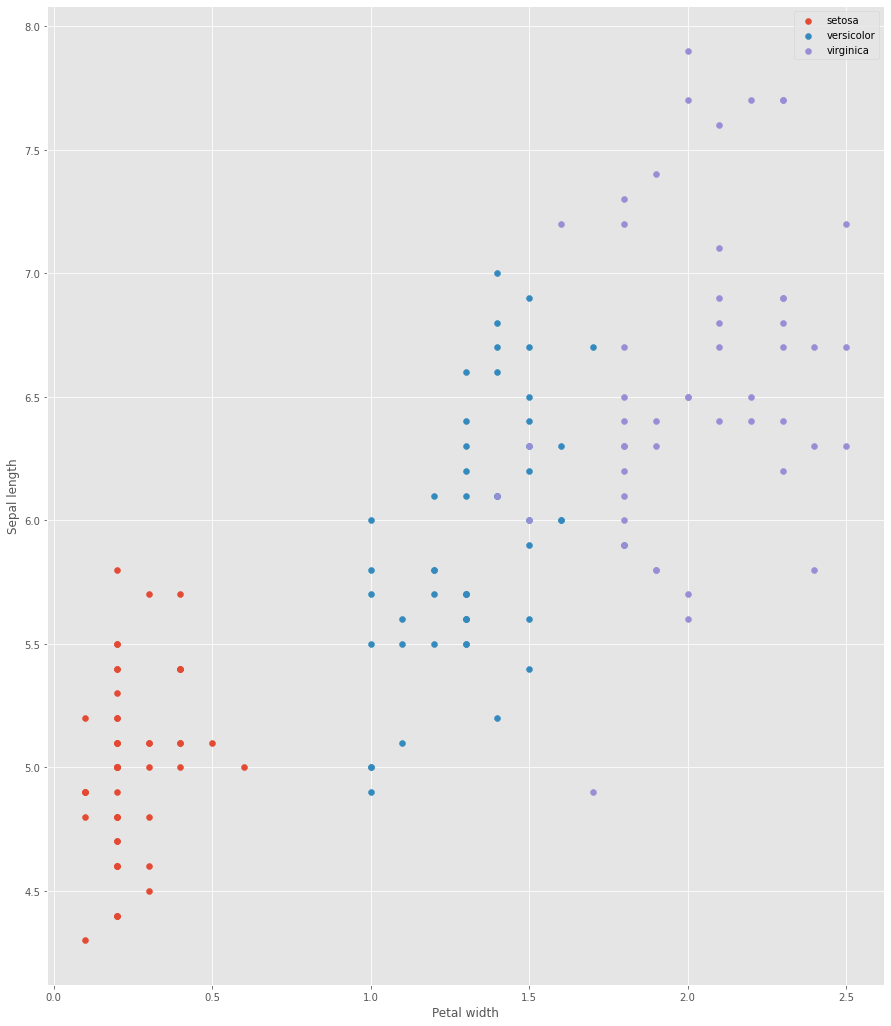

In [471]:
# new plot
fig, ax = plt.subplots()

# using pandas groupby(), returns the unique value for the variable, and the dataframe with the row with just that value
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
# show the legend
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend()

In [472]:
# groupby() typically takes a categorical variable
x = df.groupby('species')
# x is what is returned
x

In [473]:
# pivot tables - get the mean of each of the groups
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [474]:
# looping through groupby(), x is what has been returned above from dataframe df
# i is the unique value of the species, j is the data points related to that species
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}") # top 3 rows
    print()


i is: 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



<br>

__Test and Train Split__

The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm. The procedure involves taking a dataset and dividing it into two subsets, a training set which comprises 75% and a testing set comprising of 25%.

The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values.

In [475]:
# split the data frame in two
train, test = mod.train_test_split(df)

In [476]:
# show some training data
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
43,5.0,3.5,1.6,0.6,setosa
143,6.8,3.2,5.9,2.3,virginica
145,6.7,3.0,5.2,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica
127,6.1,3.0,4.9,1.8,virginica


In [477]:
# the indices of the train array - train set will have 112 rows as its dataset in this case
train.index

Int64Index([ 43, 143, 145, 135, 127,  38,  52,  62, 106, 103,
            ...
             94, 116, 119,  67,  27, 109,  58,  76, 101,  13],
           dtype='int64', length=112)

In [478]:
# show some testing data
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,versicolor
33,5.5,4.2,1.4,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica
25,5.0,3.0,1.6,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [479]:
# the test dataset indices - test dataset has 38 rows
test.index

Int64Index([ 92,  33, 118,  25,  15,  49,  97,  64,  21,  93, 134,  24,   9,
             30, 122, 141,  86, 148, 102,  99,  54,  42,  55,  17,  19, 126,
             10, 147,   2,   0,  28,   3,  77, 112,  74,   8,  63,   4],
           dtype='int64')

In [480]:
# get size of test dataset - 38
test.index.size

38

<br>

__Two Dimensions: Test Train Split__

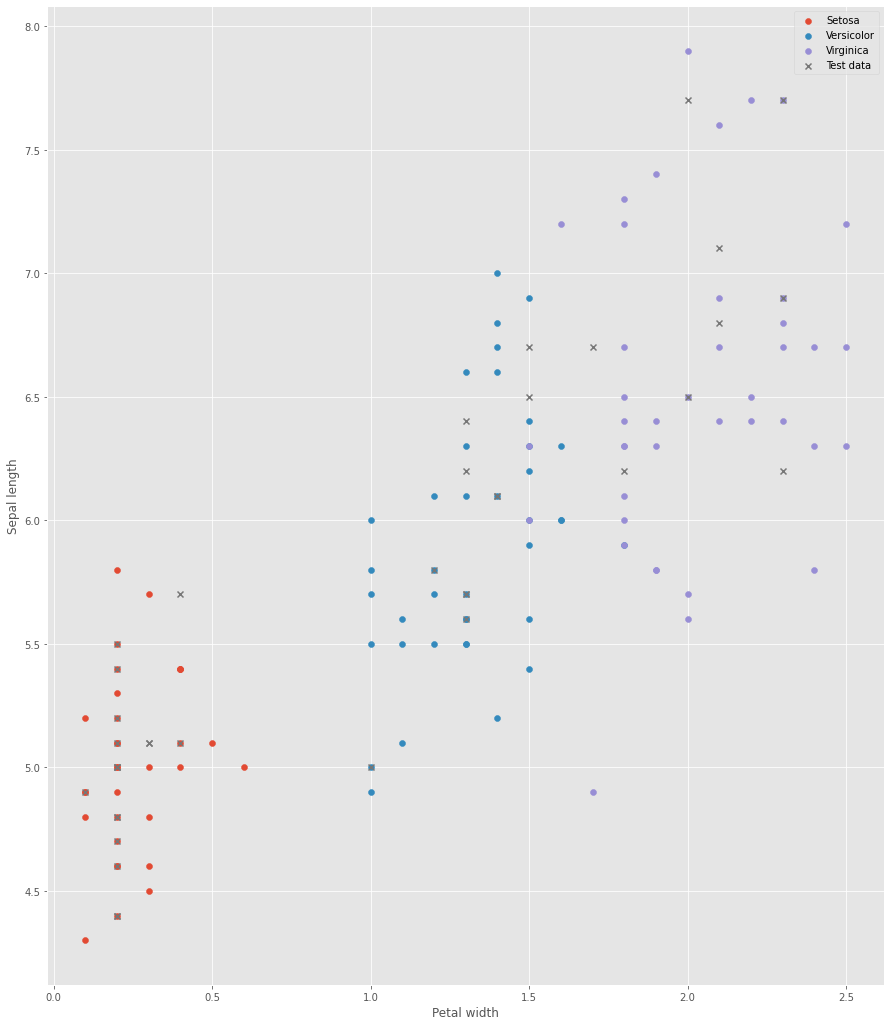

In [481]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# new plot
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend()

<br>

__Two Dimensions: Inputs and outputs__

In [482]:
# give the inputs and outputs convenient column heading names
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

In [483]:
# display first 5 inputs
inputs.head()

,sepal_length,petal_width
43,5.0,0.6
143,6.8,2.3
145,6.7,2.3
135,7.7,2.3
127,6.1,1.8


In [484]:
# display first 5 outputs
outputs.head()

43        setosa
143    virginica
145    virginica
135    virginica
127    virginica
Name: species, dtype: object

<br>

__Two Dimensions: Logistic regression__

Logistical Regression is about classification.

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [485]:
# create a new classifier, random_state can be 0 or 1 but should be set the same value every time its run
lre = lm.LogisticRegression(random_state=0)

# train the classifier on our data, fit the inputs to the outputs, fit the model to the dataset
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [486]:
# ask the classifier to classify the test data
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

In [487]:
# eyeball the misclassifiations
# compare first item in predictions with the first items in the species column of the dataset and so on
predictions == test['species']

92      True
33      True
118     True
25      True
15      True
49      True
97      True
64      True
21      True
93      True
134    False
24      True
9       True
30      True
122     True
141     True
86      True
148     True
102     True
99      True
54      True
42      True
55      True
17      True
19      True
126     True
10      True
147     True
2       True
0       True
28      True
3       True
77     False
112     True
74      True
8       True
63      True
4       True
Name: species, dtype: bool

In [488]:
# what proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], test['species'])

0.9473684210526315

<br>

__Two Dimensions: Misclassified__

In [489]:
# append a column to the test data frame with the predictions
test['predicted'] = predictions
test.head()

<ipython-input-489-be7bee3e3fa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
92,5.8,2.6,4.0,1.2,versicolor,versicolor
33,5.5,4.2,1.4,0.2,setosa,setosa
118,7.7,2.6,6.9,2.3,virginica,virginica
25,5.0,3.0,1.6,0.2,setosa,setosa
15,5.7,4.4,1.5,0.4,setosa,setosa


In [490]:
# show the misclassified data - where predicted column does not equal species column
misclass = test[test['predicted'] != test['species']]

# display rows being misclassified
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
134,6.1,2.6,5.6,1.4,virginica,versicolor
77,6.7,3.0,5.0,1.7,versicolor,virginica


In the above example virginica has been misclassified as versicolor

In [491]:
# scrutinise the descriptive statistics for the species
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.015625,3.400000,1.459375,0.253125
versicolor,5.907692,2.756410,4.253846,1.320513
virginica,6.541463,2.985366,5.524390,2.024390


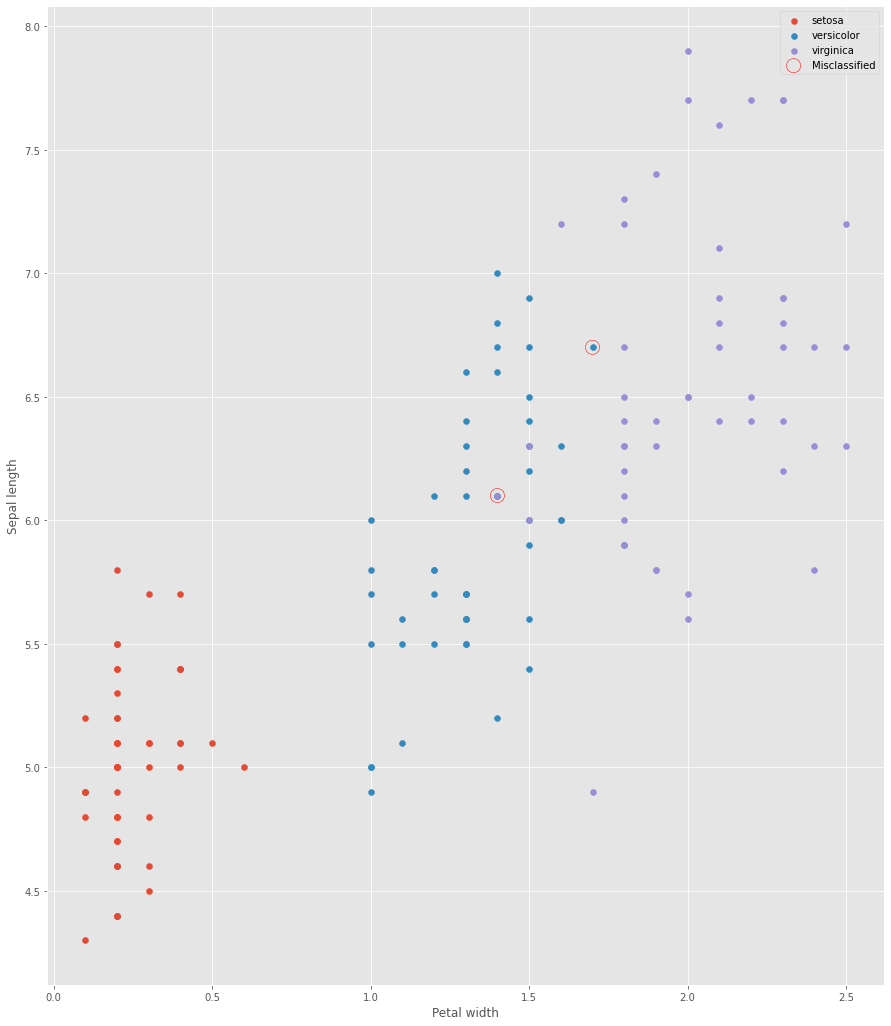

In [492]:
# new plot
fig, ax = plt.subplots()

# plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)

# plot miscalssified - plots misclassified points
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# show the legend
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend()

<br>

__Separating Setosa__

[Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)
$$\ell = \log_b \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

This is the main equation behind the algorithm for __Logistic Regression__ when there are only two classes. We have three classes Setosa, Versicolor,and Virginica. But when there are only two and you are using two input variables x1 and x2. The ideas here in the model is to try and figure out what the best values are for beta 0, beta 1 and beta 2.

<br>

___An example of where this equation would apply.___

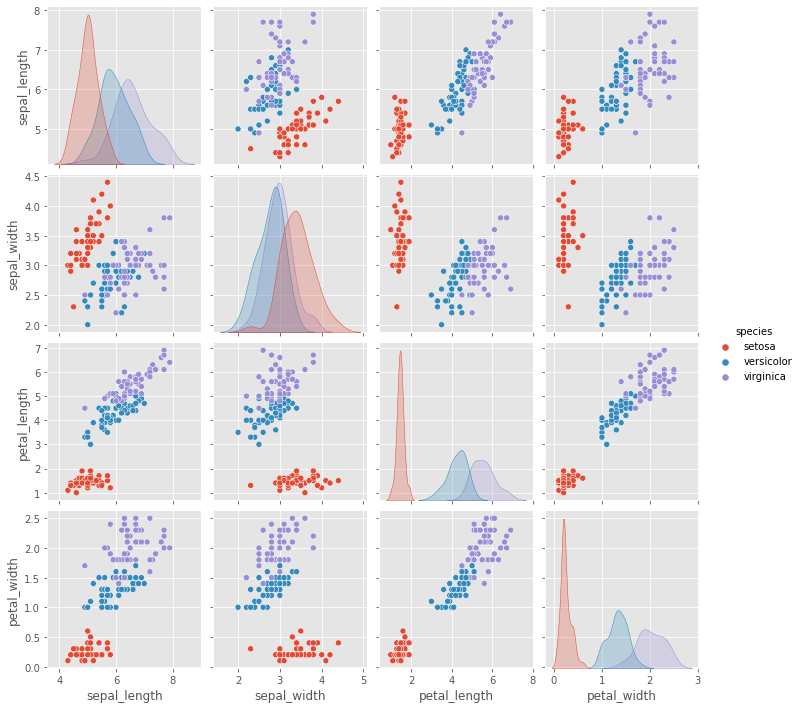

In [493]:
# another look at this plot
sns.pairplot(df, hue='species')

In [495]:
# give the inputs and outputs convenient names
inputs = train[['sepal_length', 'petal_width']]

# using apply method on training data, either return setosa or set versicolor and virginica to 'other'
outputs = train['species'].apply(lambda x: x if x == 'setosa' else 'other')

# scrutinise outputs - now there are only two classes, setosa and other
outputs.unique()

array(['setosa', 'other'], dtype=object)

In [496]:
# create a new classifier
lre = lm.LogisticRegression(random_state=0)

# train the classifier on our data
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [497]:
actual = test['species'].apply(lambda x: x if x == 'setosa' else 'other')
#actual

# what proportion wer correct
lre.score(test[['sepal_length', 'petal_width']], actual)

1.0

In the above example, we get 100% accuracy. This is because we trained a classifier to classify between 'setosa' and 'other' and not as in the previous example we trained a classifier to classifying among 'setosa', 'virginica' and 'versicolor'. Also the above Logistic Regression equation is what is being used in the background.

<br>

__Using All Possible Inputs__

[scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [509]:
# resetting the data - load the iris data set from a URL.
#df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [510]:
# split the data frame in a train set and test set
train, test = mod.train_test_split(df)

In [511]:
# use all four possible inputs
inputs, outputs = train[['sepal_length', 'sepal_width','petal_length', 'petal_width']], train['species']

In [512]:
# create new classifier
lre = lm.LogisticRegression(random_state=0)

# train classifier on our data
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [513]:
# ask the classifier to classify the test data
predictions = lre.predict(test[['sepal_length', 'sepal_width','petal_length', 'petal_width']])
predictions

array(['virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa'], dtype=object)

In [554]:
#scrutinise the misclassifications
(predictions == test['species']).value_counts()

True     37
False     1
Name: species, dtype: int64

In above example it is comparing the predictions the model is making to the species. We can see the algorithm got 37 predictions correct and only one wrong out of the 38 samples.

In [517]:
# what proportion were correct?
lre.score(test[['sepal_length', 'sepal_width','petal_length', 'petal_width']], test['species'])

0.9736842105263158

<br>

___k___ __Nearest Neighbours classifier__

[scikit-learn KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. 

In [520]:
# load the iris data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [521]:
# split data frame in two - train and test data sets
train, test = mod.train_test_split(df)

In [533]:
# use all four possible inputs
inputs, outputs = train[['sepal_length', 'sepal_width','petal_length', 'petal_width']], train['species']

In [534]:
# KNeighbors classifier
knn = nei.KNeighborsClassifier()

In [535]:
# fit
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [536]:
# test, what proportion were correct
knn.score(test[['sepal_length', 'sepal_width','petal_length', 'petal_width']], test['species'])

0.9736842105263158

In [538]:
# predict, ask the classifier to classify the test data
predictions = lre.predict(test[['sepal_length', 'sepal_width','petal_length', 'petal_width']])
(predictions == test['species']).value_counts()

True     37
False     1
Name: species, dtype: int64

In above example it is comparing the predictions the model is making to the species. We can see the algorithm got 37 predictions correct and only one wrong out of the 38 samples.

In [541]:
# the score is just the accuracy in this case
(predictions == test['species']).value_counts(normalize=True)

True     0.973684
False    0.026316
Name: species, dtype: float64

<br>

__Cross validation__

[scikit-learn Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

Split data set into four random equal parts or there abouts, then do the fit() four different times. If you have four different segments of your data set, then train on three of the parts and test on the fourth.

In [553]:
# KNeighbors classifier
knn = nei.KNeighborsClassifier()

# model_selection
scores = mod.cross_val_score(knn, df[['sepal_length', 'sepal_width','petal_length', 'petal_width']], df['species'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [547]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


In [551]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['sepal_length', 'sepal_width','petal_length', 'petal_width']], df['species'])
scores

D:\Users\Walter\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\Walter\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [552]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


<br>

## End Classification Lecture Tutorial

<br>

## Regression Lecture Tutorial
***

<br>

## NumPy Documentation
***

### NumPy quickstart
[Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)

__Some Basics__

In [358]:
import numpy as np

In [359]:
# range function generator
range(5)

range(0, 5)

In [360]:
# displays a list exclusive of 5
list(range(5))

[0, 1, 2, 3, 4]

In [361]:
# lists start(inclusive) to end(exclusive) with a step of 2
list(range(1, 10, 2))

[1, 3, 5, 7, 9]

In [362]:
# wraps range in a numpy array
a = np.arange(1, 10, 2)
a

array([1, 3, 5, 7, 9])

In [363]:
# displays type of elements in array
a.dtype

dtype('int32')

In [364]:
a.dtype.name

'int32'

In [365]:
# pass floating point numbers and fractional steps
b = np.arange(1.5, 4.21, 0.02)
b

array([1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 ,
       1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92,
       1.94, 1.96, 1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14,
       2.16, 2.18, 2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36,
       2.38, 2.4 , 2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58,
       2.6 , 2.62, 2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 ,
       2.82, 2.84, 2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.  , 3.02,
       3.04, 3.06, 3.08, 3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 , 3.22, 3.24,
       3.26, 3.28, 3.3 , 3.32, 3.34, 3.36, 3.38, 3.4 , 3.42, 3.44, 3.46,
       3.48, 3.5 , 3.52, 3.54, 3.56, 3.58, 3.6 , 3.62, 3.64, 3.66, 3.68,
       3.7 , 3.72, 3.74, 3.76, 3.78, 3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 ,
       3.92, 3.94, 3.96, 3.98, 4.  , 4.02, 4.04, 4.06, 4.08, 4.1 , 4.12,
       4.14, 4.16, 4.18, 4.2 ])

In [366]:
# displays type of elements in array
b.dtype

dtype('float64')

In [367]:
b.dtype.name

'float64'

In [368]:
# pass floating point numbers with integer steps
c = np.arange(1.5, 10.21, 2)
c

array([1.5, 3.5, 5.5, 7.5, 9.5])

In [369]:
# type of array elements is float regardless of step type being an integer
c.dtype

dtype('float64')

In [370]:
# gives a tuple of array dimensions and can be used to change the dimensions of an array.
c.shape

(5,)

In [371]:
# reshape tool gives a new shape to an array without changing its data.
# it creates a new array and does not modify the original array itself.

a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [372]:
a.shape

(3, 5)

In [373]:
# displays 1 column, -1 tell numpy to figure out number of rows
a.reshape(-1, 1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [374]:
# ndim property is used to get an int representing the number of axes / array dimensions
a.ndim

2

In [375]:
# c is 1 dimensional
c.ndim

1

In [376]:
# returns the size (in bytes) of each element array
a.itemsize

4

In [377]:
# number of elements in array
# c elements are integer numbers

a.size

15

In [378]:
# returns the size (in bytes) of each element array
# c elements are floating point numbers

c.itemsize

8

In [379]:
# identifies the type
type(a)

numpy.ndarray

In [380]:
type(c)

numpy.ndarray

In [381]:
d = np.array([6, 7, 8])
d

array([6, 7, 8])

In [382]:
type(d)

numpy.ndarray

In [383]:
num = 9
num

9

In [384]:
# displays num as an integer type
type(num)

int

In [385]:
# list between 0 and 10 with increments of 0.1
x = np.arange(0.0, 10.0, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [386]:
# plot squared function
y = x**2
y

array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
       3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
       1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
       3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
       5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
       9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
       1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
       1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
       2.304e+01, 2.401e+01, 2.500e+01, 2.601e+01, 2.704e+01, 2.809e+01,
       2.916e+01, 3.025e+01, 3.136e+01, 3.249e+01, 3.364e+01, 3.481e+01,
       3.600e+01, 3.721e+01, 3.844e+01, 3.969e+01, 4.096e+01, 4.225e+01,
       4.356e+01, 4.489e+01, 4.624e+01, 4.761e+01, 4.900e+01, 5.041e+01,
       5.184e+01, 5.329e+01, 5.476e+01, 5.625e+01, 5.776e+01, 5.929e+01,
       6.084e+01, 6.241e+01, 6.400e+01, 6.561e+01, 

In [387]:
# creates numeric sequences, similar to the NumPy arange function,
# in that it creates sequences of evenly spaced numbers structured as a NumPy array

#np.linspace(0.0, 10.0, 100) # at 100
np.linspace(0.0, 10.0, 101) # at 101

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [388]:
# create an all zero's array - takes a single parameter, returns floating point numbers
np.zeros(3)

array([0., 0., 0.])

In [389]:
# pass tuple to create multi-dimensional array
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [390]:
# create an all 1's array - takes a single parameter
np.ones(3)

array([1., 1., 1.])

In [391]:
# create an all 1's array - takes a single parameter
j = np.ones((3, 5))
j

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [392]:
# displays floating point
j.dtype

dtype('float64')

In [393]:
# idenity matrix
i = np.eye(3)
i

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [394]:
i.dtype

dtype('float64')

In [395]:
# cast i to integer array type
i.astype('int64')

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

***
### Array Creation
__There are several ways to create arrays__

Arrays can be created from a regular Python list or tuple using the <font color='red'>array</font> function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [396]:
# create array using array funtion, provides a single sequence within the square brackets 
x = np.array([2, 3, 4])
x

array([2, 3, 4])

In [397]:
x.dtype

dtype('int32')

In [398]:
x.astype('int64')

array([2, 3, 4], dtype=int64)

In [399]:
y = np.array([1.2, 3.5, 5.1])
y

array([1.2, 3.5, 5.1])

In [400]:
y.dtype

dtype('float64')

A frequent error consists in calling <font color='red'>array</font> with multiple arguments, rather than providing a single sequence as an argument.

In [401]:
# wrong
#a = np.array(1, 2, 3, 4) # commented out / uncomment to see error

<font color='red'>array</font> transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [402]:
# sequences of sequences into 2-dimensional array
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [403]:
# array is deemed a float type
b.dtype

dtype('float64')

The type of the array can also be explicitly specified at creation time

In [404]:
# complex numbers
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [405]:
# display type
c.dtype

dtype('complex128')

When the elements of an array are originally unknown, but its size is known. Can use one of several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

In [406]:
# the function zeros creates an array full of zeros
np.zeros((3, 4)) # rows, columns

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [407]:
# the function ones creates an array full of ones - can specify dtype on creation
np.ones((2, 3, 4), dtype=np.int16) # 2 arrays, rows, columns

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [408]:
# the function empty creates an array whose initial content is random
# and depends on the state of the memory
np.empty((2, 3))

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

The <span style=color='red'>arange</span> function creates sequences of numbers which is analogous to the Python built-in <font color='red'>range</font>, but returns an array.

In [409]:
# pass start, end, and step values respectively - end is exclusive
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [410]:
# pass start, end, and floating step
np.arange(0, 2, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When using <font color='red'>arange</font> with floating point numbers, it is not possible to predict the number of elements obtained, due to the finite floating point precision. Better to use the function <font color='red'>linspace</font> as it takes the number of elements that we want, instead of the step.

In [411]:
# displays 9 number from 0 to 2
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [412]:
from numpy import pi

# create array with many elements - useful to evaluate function at lots of points
x = np.linspace(0, 2 * pi, 10) # at 10 elements
#x = np.linspace(0, 2 * pi, 100) # at 100 elements
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [413]:
# evaluate function at many different points
f = np.sin(x)
f

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

***
## Printing Arrays

#### End - NumPy Quickstart
***

<br><br>
## NumPy Tutorial: Your First Steps Into Data Science in Python
[Real Python](https://realpython.com/numpy-tutorial/)
***

In [414]:
CURVE_CENTER = 80

In [415]:
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])

In [416]:
def curve(grades):
    average = grades.mean()
    change = CURVE_CENTER - average
    new_grades = grades + change
    return np.clip(new_grades, grades, 100)

In [417]:
curve(grades)

array([ 91.25,  54.25,  83.25, 100.  ,  70.25, 100.  ,  93.25,  31.25])

#### End - NumPy Tutorial: Your First Steps Into Data Science in Python
***

<br><br>
## The Pandas Tutorial
[pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)
***

### Topic 1: 10 minutes to pandas

In [418]:
# pandas uses numpy under the hood
import numpy as np

In [419]:
# pandas will import numpy regardless
import pandas as pd

### Object Creation

__Creating a Series by passing a list of values, letting pandas create a default integer index__

In [420]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [421]:
# display 
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

__Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns__

In [422]:
dates = pd.date_range("20130101", periods=6)

In [423]:
# display DatetimeIndex
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [424]:
# uses dates in previous as index, creates some random values, creates headings
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [425]:
# display DataFrame
df

,A,B,C,D
2013-01-01,-0.890945,1.192165,0.961140,0.236869
2013-01-02,-0.928457,-0.355420,1.014047,0.391712
2013-01-03,-0.176906,-0.681415,0.045955,-0.977355
2013-01-04,-0.342245,-0.827971,-0.984838,1.297908
2013-01-05,-0.772621,-0.218168,0.224243,-0.323736
2013-01-06,0.701531,1.011897,1.441354,0.925441


__Creating a DataFrame by passing a dict of objects that can be converted to series-like__

In [426]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [427]:
# display DataFrame
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [428]:
# The columns of the resulting DataFrame have different dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

__If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Below is a small subset of the attributes that will be completed.__

In [429]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [430]:
df2.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [431]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

### Viewing data
__Here is how to view the top and bottom rows of the frame__

In [432]:
df.head()

,A,B,C,D
2013-01-01,-0.890945,1.192165,0.961140,0.236869
2013-01-02,-0.928457,-0.355420,1.014047,0.391712
2013-01-03,-0.176906,-0.681415,0.045955,-0.977355
2013-01-04,-0.342245,-0.827971,-0.984838,1.297908
2013-01-05,-0.772621,-0.218168,0.224243,-0.323736


In [433]:
# default is 5 rows
df.tail(3)

,A,B,C,D
2013-01-04,-0.342245,-0.827971,-0.984838,1.297908
2013-01-05,-0.772621,-0.218168,0.224243,-0.323736
2013-01-06,0.701531,1.011897,1.441354,0.925441


In [434]:
# display the index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [435]:
# display columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [436]:
# displays numPy representation of the underlying data
#df.to_numpy()

In [437]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.401607,0.020181,0.450317,0.258473
std,0.620581,0.867932,0.875805,0.825800
min,-0.928457,-0.827971,-0.984838,-0.977355
25%,-0.861364,-0.599916,0.090527,-0.183585
50%,-0.557433,-0.286794,0.592691,0.314291
75%,-0.218241,0.704381,1.000820,0.792009
max,0.701531,1.192165,1.441354,1.297908


In [438]:
# transposing the data
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.890945,-0.928457,-0.176906,-0.342245,-0.772621,0.701531
B,1.192165,-0.355420,-0.681415,-0.827971,-0.218168,1.011897
C,0.961140,1.014047,0.045955,-0.984838,0.224243,1.441354
D,0.236869,0.391712,-0.977355,1.297908,-0.323736,0.925441


In [439]:
# sorting by axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.236869,0.961140,1.192165,-0.890945
2013-01-02,0.391712,1.014047,-0.355420,-0.928457
2013-01-03,-0.977355,0.045955,-0.681415,-0.176906
2013-01-04,1.297908,-0.984838,-0.827971,-0.342245
2013-01-05,-0.323736,0.224243,-0.218168,-0.772621
2013-01-06,0.925441,1.441354,1.011897,0.701531


In [440]:
# sorting by values - column B ascending order
df.sort_values(by="B")

,A,B,C,D
2013-01-04,-0.342245,-0.827971,-0.984838,1.297908
2013-01-03,-0.176906,-0.681415,0.045955,-0.977355
2013-01-02,-0.928457,-0.355420,1.014047,0.391712
2013-01-05,-0.772621,-0.218168,0.224243,-0.323736
2013-01-06,0.701531,1.011897,1.441354,0.925441
2013-01-01,-0.890945,1.192165,0.961140,0.236869


__read an comma separeted values dataset - using an iris dataset from gist repo url__

In [441]:
df1 = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [442]:
# display dataset in pandas dataFrame
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [443]:
# sepal column length
df1['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [444]:
# list of sepal columns
df1[['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [445]:
# display second row of dataFrame
df1[['sepal_length', 'sepal_width']].iloc[1]

sepal_length    4.9
sepal_width     3.0
Name: 1, dtype: float64

In [446]:
# displays numPy representation of the underlying data
numArray = df1['sepal_length'].to_numpy()
numArray

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [447]:
# display type
type(numArray)

numpy.ndarray

### Selection

#### 1 Getting

In [448]:
# Selecting a single column, which yields a Series, equivalent to df.A:
df["A"]

2013-01-01   -0.890945
2013-01-02   -0.928457
2013-01-03   -0.176906
2013-01-04   -0.342245
2013-01-05   -0.772621
2013-01-06    0.701531
Freq: D, Name: A, dtype: float64

__Selecting via [], which slices the rows__

In [449]:
df[0:3]

,A,B,C,D
2013-01-01,-0.890945,1.192165,0.961140,0.236869
2013-01-02,-0.928457,-0.355420,1.014047,0.391712
2013-01-03,-0.176906,-0.681415,0.045955,-0.977355


In [450]:
df["20130102": "20130104"]

,A,B,C,D
2013-01-02,-0.928457,-0.355420,1.014047,0.391712
2013-01-03,-0.176906,-0.681415,0.045955,-0.977355
2013-01-04,-0.342245,-0.827971,-0.984838,1.297908


#### 2. Selection by label

In [451]:
# For getting a cross section using a label - first row
df.loc[dates[0]]

A   -0.890945
B    1.192165
C    0.961140
D    0.236869
Name: 2013-01-01 00:00:00, dtype: float64

In [452]:
# Selecting on a multi-axis by label
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.890945,1.192165
2013-01-02,-0.928457,-0.355420
2013-01-03,-0.176906,-0.681415
2013-01-04,-0.342245,-0.827971
2013-01-05,-0.772621,-0.218168
2013-01-06,0.701531,1.011897


In [453]:
# Showing label slicing, both endpoints are included
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.928457,-0.355420
2013-01-03,-0.176906,-0.681415
2013-01-04,-0.342245,-0.827971


In [454]:
# Reduction in the dimensions of the returned object
df.loc["20130102", ["A", "B"]]

A   -0.928457
B   -0.355420
Name: 2013-01-02 00:00:00, dtype: float64

In [455]:
# getting a scalar value
df.loc[dates[0], "A"]

-0.8909447798092223

In [456]:
# For getting fast access to a scalar (equivalent to the prior method)
df.at[dates[0], "A"]

-0.8909447798092223

#### 3. Selection by position